# Predicting housing prices in King County

In this project, we are going to use the king county housing prices dataset to try to predict the housing prices in king county, Washington state, USA. The dataset is from https://www.kaggle.com/datasets/harlfoxem/housesalesprediction. The project starts by having some EDA, where plots are created to show the releationship between the different columns. Further, outliers are located and removed. In addition are new columns created such that the dataset fits better into the machine learning algorithms which are going to be used for giving an accurate prediction as possible. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('kc_house_data.csv')
display(data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Description of the columns in the dataset**

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885

**Summary statistics**

Generated  descriptive statistics that include those that summarize the central tendency, dispersion and shape of a dataset’s distribution

In [4]:
display(data.describe().drop(['id', 'price', 'zipcode'], axis=1))

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Now, let's see how the price varies in the dataset, and some statistics on the feature.

In [5]:
display((data['price'].describe()).to_frame())

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


Does the data contain null values?

In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Seems like the data is in fact complete without null values. 

## A further look at the data

**Timeframe of the data**

In [7]:
earliest_data, latest_data = data['date'].min(), data['date'].max()

print('Earliest date: ', earliest_data)
print('Latest date: ', latest_data)

Earliest date:  20140502T000000
Latest date:  20150527T000000


One can see that the data was collected between 2nd of February 2014, and 27th of May 2015. We remove the meaningless part of the date (time which is always set to midnight). 

In [8]:
data['date'] = data.apply(lambda x: x.date[0:8], axis=1)
data['date'].head()

0    20141013
1    20141209
2    20150225
3    20141209
4    20150218
Name: date, dtype: object

We can add a new column named 'age' based on the sale of the house and the year built.

In [9]:
data['age'] = data.apply(lambda x: int(x.date[0:4]) - x.yr_built, axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


Now, let's take a look at the price column. Let's plot it's distributions.

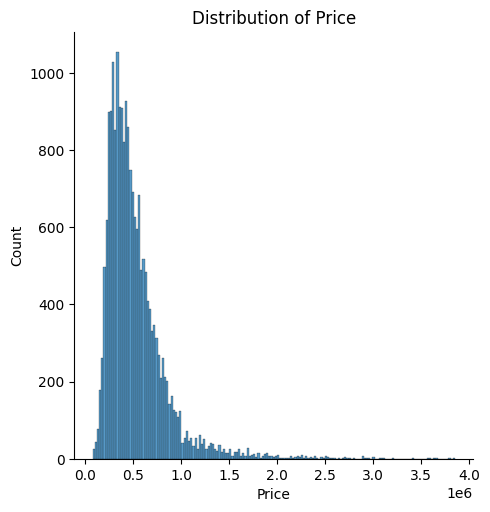

Text(0.5, 0, 'Count')

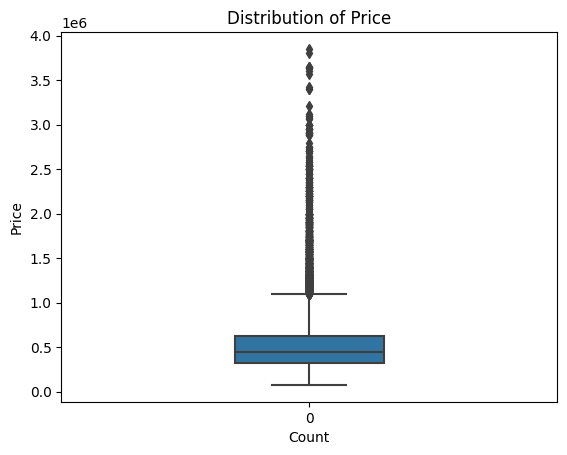

In [40]:
sns.displot(data['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

sns.boxplot(data['price'],width=0.3)
plt.title('Distribution of Price')
plt.ylabel('Price')
plt.xlabel('Count')


By looking at the price column, we observe that there prices are not ideally distributed, and we should probably transform it. 

Text(-3.6805555555555554, 0.5, 'Count')

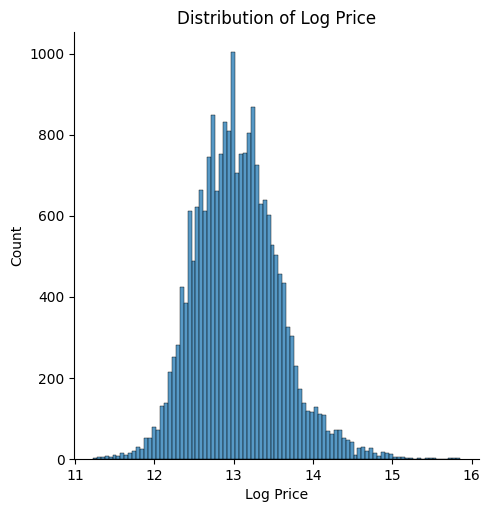

In [11]:
data['log price'] = data['price'].apply(lambda x: np.log(x))
sns.displot(data['log price'])
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Count')

Taking a look at the bedroom feature, one can see that there are some outliers.

,Number of houses
Bedrooms,
3,9824
2,2760
4,6882
5,1601
1,199
6,272
7,38
0,13
8,13


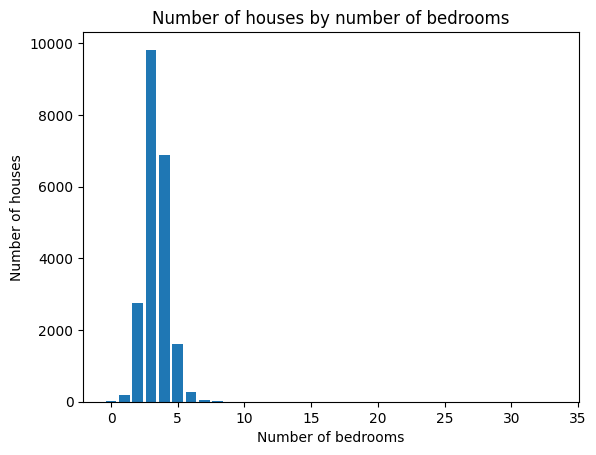

In [12]:

bedroom_unique_values = data['bedrooms'].unique()

def houses_by_bedrooms(df, n_bedrooms):
    return df[df['bedrooms']==n_bedrooms]['id'].count()

n_houses_by_bedrooms = {}
for bedroom in bedroom_unique_values:
    n_houses = houses_by_bedrooms(data, bedroom)
    n_houses_by_bedrooms[bedroom] = n_houses
plt.bar(list(n_houses_by_bedrooms.keys()), list(n_houses_by_bedrooms.values()))
plt.title('Number of houses by number of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Number of houses')
display(pd.DataFrame(n_houses_by_bedrooms.items(), columns=['Bedrooms', 'Number of houses']).set_index('Bedrooms'))


So we do indeed have a few outliers. Let's remove them. But first, let's look at the price distribution for each unique value of bedrooms.

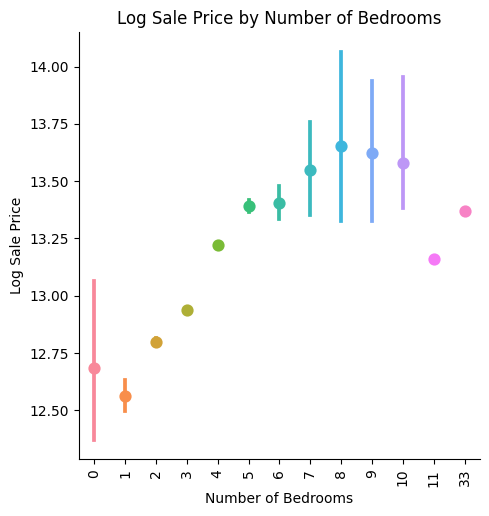

In [13]:
def price_bedroom(dataframe):
    df = pd.DataFrame()
    df['Log Sale Price']= dataframe['log price']
    df['Bedrooms'] = dataframe['bedrooms']
    df['Bedrooms'] = dataframe['bedrooms'].apply(lambda x: int(x))
    ax = sns.catplot(x="Bedrooms", y="Log Sale Price", hue='Bedrooms', data=df, kind="point")
    ax.set_xticklabels(rotation=90)
    plt.title('Log Sale Price by Number of Bedrooms')
    plt.xlabel('Number of Bedrooms')
    plt.show()

price_bedroom(data)

Seems like capping the number of bedrooms between 1 and 7 seems like a good idea. The other feature values don't look very predictive of the price. We also don't remove too many values this way.

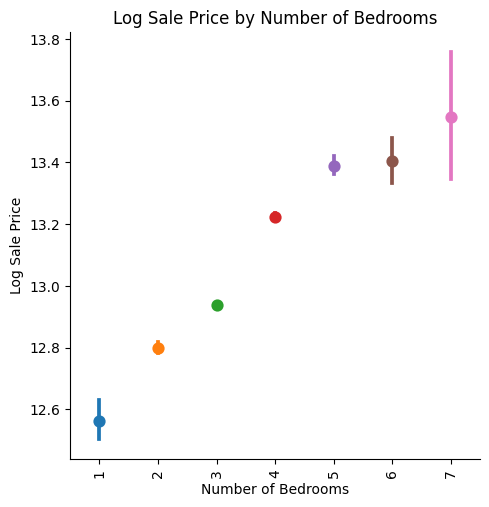

In [14]:
data = data[(data['bedrooms'] < 8) & (data['bedrooms'] > 0)] 
price_bedroom(data)

Now, let's take a look at the zip codes are houses are in. 

In [15]:
num_zips = len(pd.unique(data['zipcode']))
num_zips

70

There are 70 unique zip codes. 

In [16]:
def top_n_zipcodes(df, n):
    top_20 = df['zipcode'].value_counts(ascending=False).to_frame().head(n)
    in_top_n_zips = data.join(top_20, on='zipcode', rsuffix='s').dropna()
    in_top_n_zips = in_top_n_zips.drop(columns=['zipcode'])
    return in_top_n_zips

top_20 = top_n_zipcodes(data, 20)
top_10 = top_n_zipcodes(data, 10)
top_5 = top_n_zipcodes(data, 5)
dict = {'Top 20': len(top_20), 'Top 10': len(top_10), 'Top 5': len(top_5)}
display_top = pd.DataFrame(dict.items(), columns=['Top n zip codes', 'Number of houses']).set_index('Top n zip codes')
display_top


,Number of houses
Top n zip codes,
Top 20,9857
Top 10,5493
Top 5,2899


We can see that the zipcodes have some price variety in each one, let's find the most expensive zip codes.

In [17]:
def find_expensive_zips(data, n=10, metric=np.median):
    zips = data.groupby('zipcode').median().sort_values('log price', ascending=False).index[:n]
    return [int(code) for code in zips]

expensive_zips = find_expensive_zips(data, 10, np.median)
display(expensive_zips)

[98039, 98004, 98040, 98112, 98005, 98006, 98119, 98075, 98109, 98102]

From this source: https://www.iheart.com/content/2022-05-05-these-washington-zip-codes-have-the-most-expensive-homes/

We found out that the most expensive zip codes in king county belongs to Medina (98039), Bellevue (98004), Mercer Island (98040), Seattle (98112) and Sammamish (98075). Our zip codes are for top 10 moist expensive zip codes include these areas.

In [18]:
def averagePirceByZipCode(zipCode):
    return data[data['zipcode'] == zipCode]['price'].mean()

medina = averagePirceByZipCode(98039)
bellevue = averagePirceByZipCode(98004)
mercer_island = averagePirceByZipCode(98040)
seattle = averagePirceByZipCode(98112)
sammamisg = averagePirceByZipCode(98075)

table = [['Medina', medina], ['Bellevue', bellevue], ['Mercer Island', mercer_island], ['Seattle', seattle], ['Sammamisg', sammamisg]]
print(tabulate(table, headers = ['zipcode','average price']))


zipcode           average price
-------------  ----------------
Medina              2.16061e+06
Bellevue            1.35312e+06
Mercer Island       1.19423e+06
Seattle             1.08549e+06
Sammamisg      790577


Let's add in a column which takes the value 1 if the house was sold in an expensive zipcode

In [19]:
def add_in_expensive_zip(data, zips):
    data['in_expensive_zip'] = data['zipcode'].isin(zips).astype(int)
    return data

expensive_zipcodes = find_expensive_zips(data, 3, np.median)
training_data = add_in_expensive_zip(data, expensive_zipcodes)
training_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,log price,in_expensive_zip
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,59,12.309982,0
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,0
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,82,12.100712,0
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329,0
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,28,13.142166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,5,12.793859,0
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,1,12.899220,0
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,5,12.904459,0
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,11,12.899220,0


**Outliers**

Outliers are important as they can significantly affect our models. Previously, we detected and removed some outliers looking at the bedroom feature. Let's see if we can remove some more outliers.

Size of data before removing outliers:  (21576, 24)


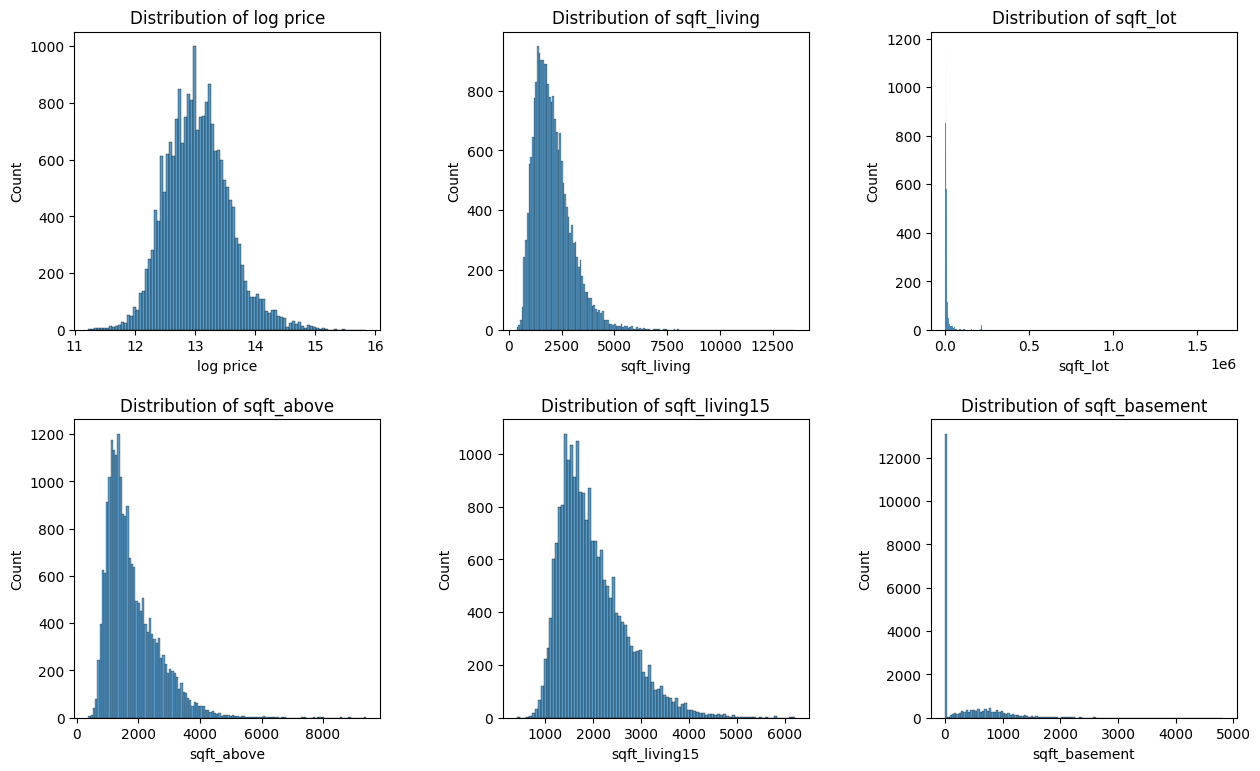

In [20]:
cont_features=['log price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_basement']
def plot_continuous(df, cont_features):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
    axs = axs.flatten()
    for i, feature in enumerate(cont_features):
        sns.histplot(data=df, x=feature, ax=axs[i])
        axs[i].set_title(f'Distribution of {feature}')
        axs[i].set_xlabel(f'{feature}')
        axs[i].set_ylabel('Count')
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.4)

def remove_outliers(df, col, upper, lower):
    return df[(df[col] < upper) & (df[col] > lower)]
    
plot_continuous(data, cont_features)
print("Size of data before removing outliers: ", data.shape)

We see that most of these variables have notable outliers. Let's remove them.

Size of data after removing outliers:  (20637, 24)


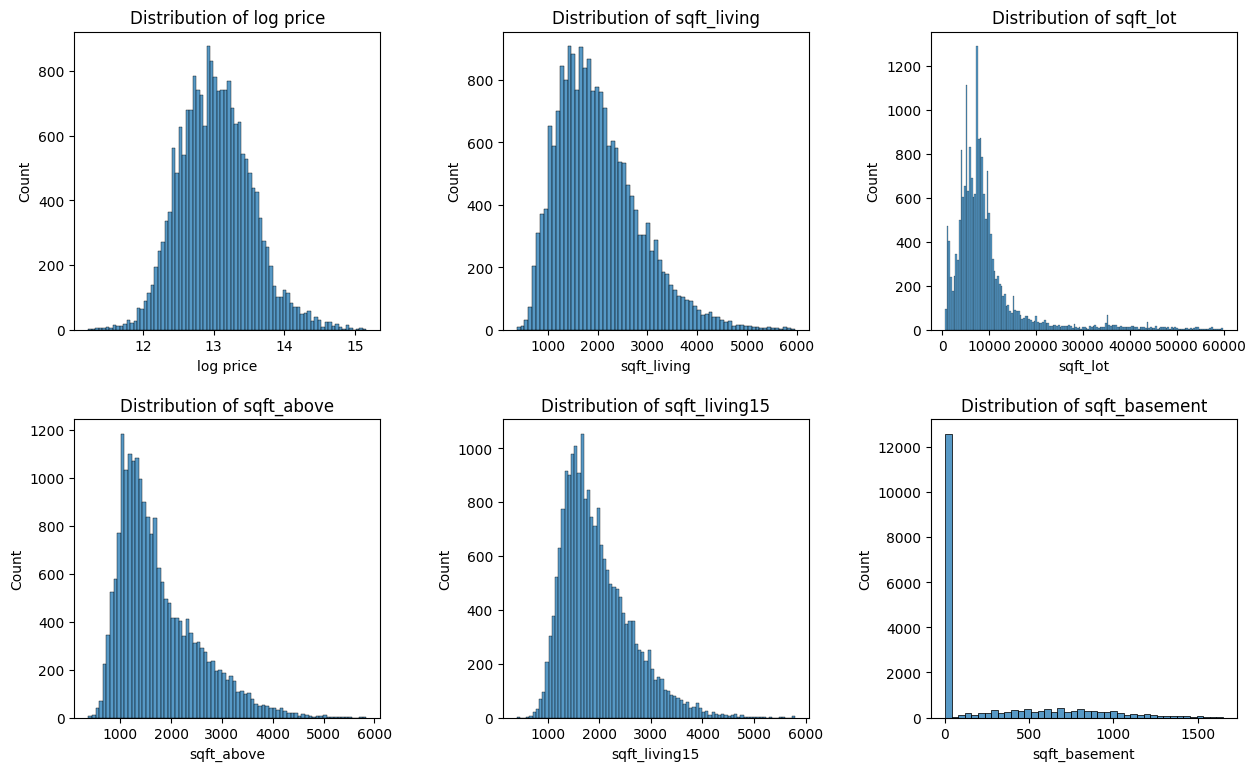

In [21]:
outlier_features = {'sqft_living': (6000, 200),
                    'sqft_lot': (0.6*1e5, 0), 
                    'sqft_above': (6000, 0), 
                    'sqft_basement': (data['sqft_basement'].quantile(0.99), -np.inf)}

def remove_outliers_from_dict(df, outlier_features):
    for feature, bounds in outlier_features.items():
        df = remove_outliers(df, feature, bounds[0], bounds[1])
    return df

data = remove_outliers_from_dict(data, outlier_features)

plot_continuous(data, cont_features)

print("Size of data after removing outliers: ", data.shape)

Finally, one can notice that the majority of houses don't have basements, that is, the value of sqft_basement is 0. Lets create a new column named has_basement, which is dependent on the value of sqft_basement.

In [22]:
data['has_basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,log price,in_expensive_zip,has_basement
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,59,12.309982,0,0
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,63,13.195614,0,1
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,82,12.100712,0,0
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,49,13.311329,0,1
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,28,13.142166,0,0


# Data relationships

Let's take a look in the relationships and collinearity of the independent features in our dataset.

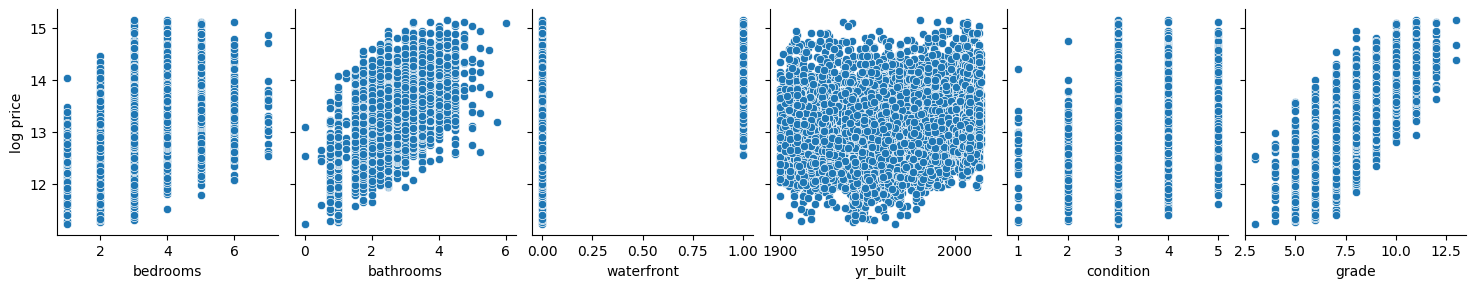

In [23]:
g = sns.pairplot(data=data,
             x_vars = ['bedrooms', 'bathrooms', 'waterfront', 'yr_built', 'condition', 'grade'],
             y_vars=['log price'])
g.fig.set_size_inches(15,3)
plt.show()

The data looks a bit overplotted, but one can still clearly see the relationships between the independent variables and the sale price. Let's plot the correlations between our features. One take away is that age and year built almost has no impact on the sale price.

Let's look at continous features only, including kde for each variable

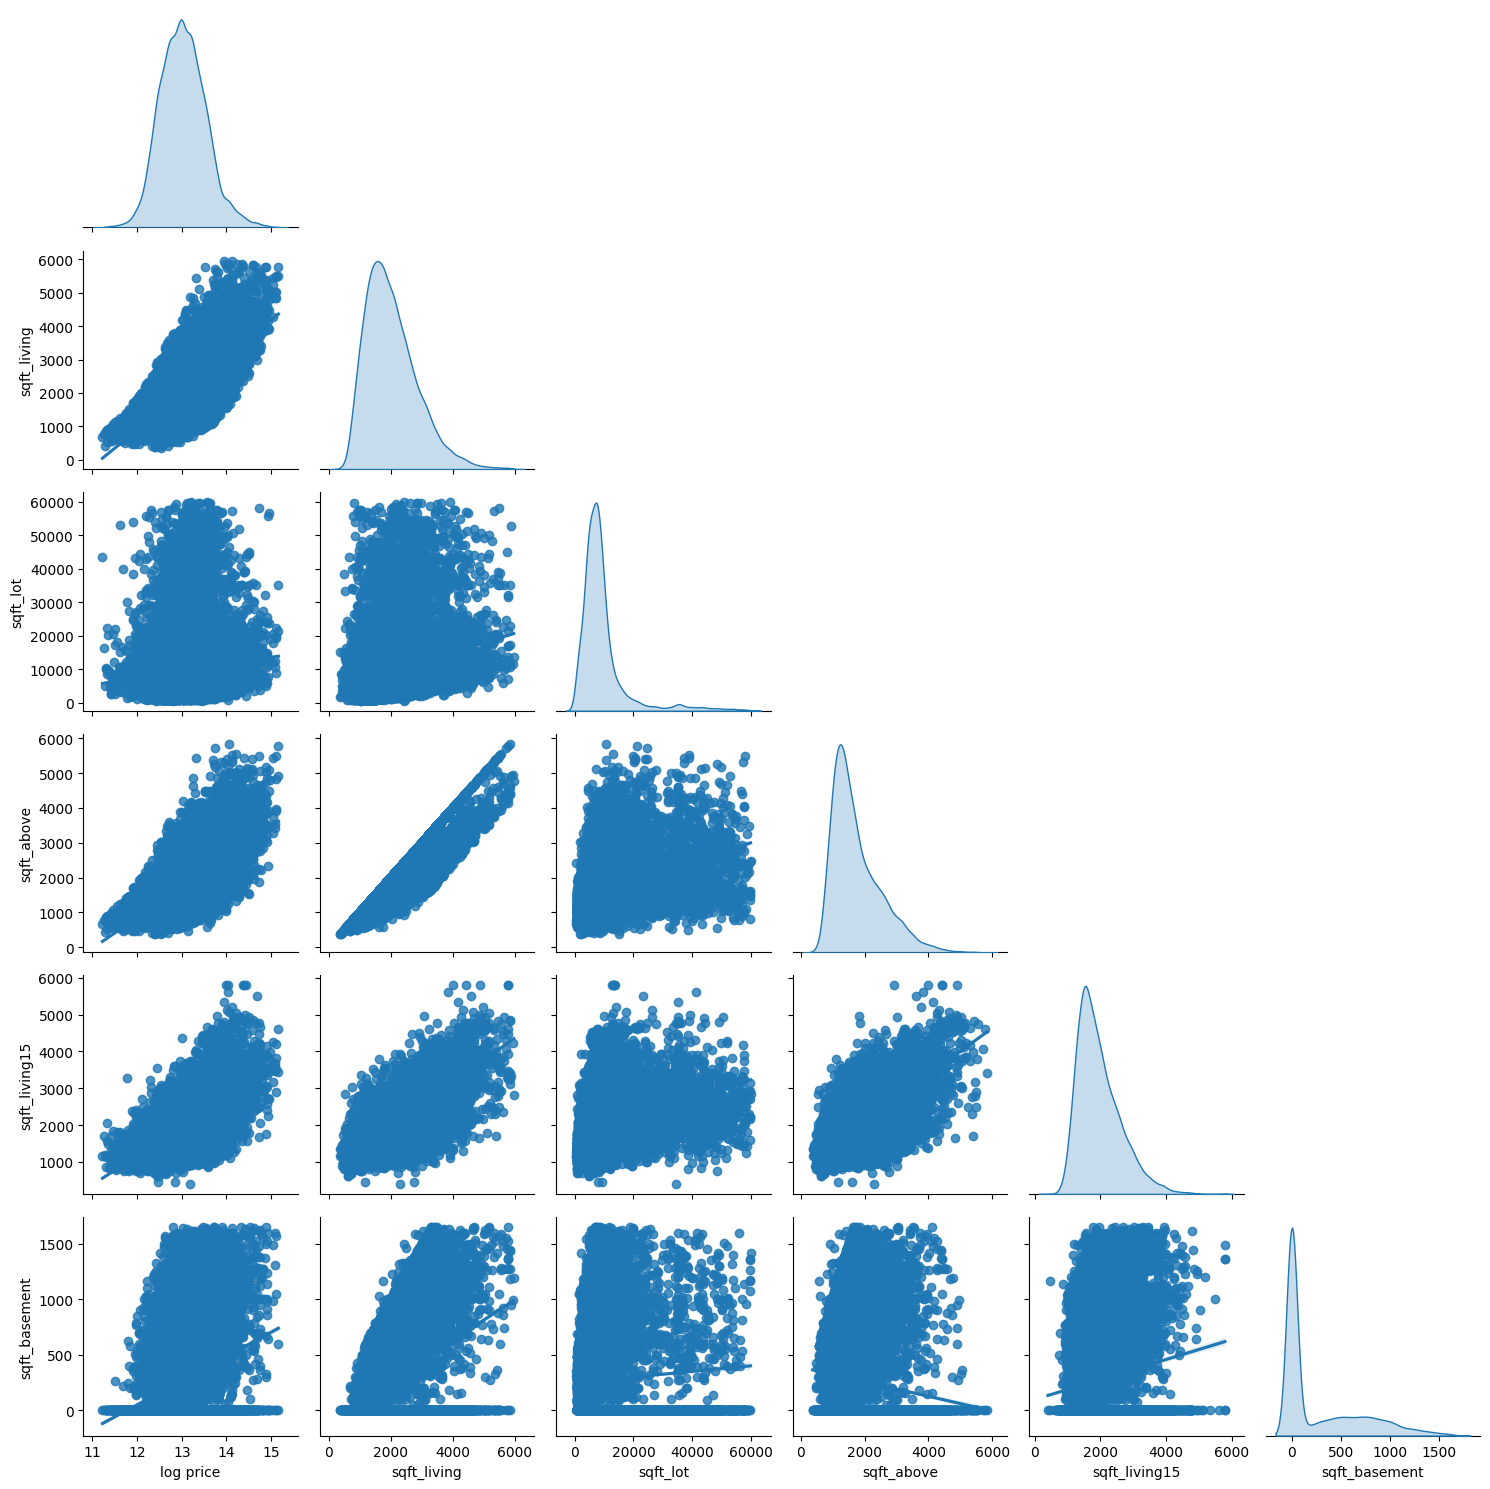

In [24]:
cont_feat=['log price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_basement']

sns.pairplot(data[cont_feat], kind="reg", diag_kind='kde', corner=True)
plt.tight_layout()
plt.show()

And correlations between all the variables, looking for collinearity.

Text(0.5, 1.0, 'Correlation Heatmap')

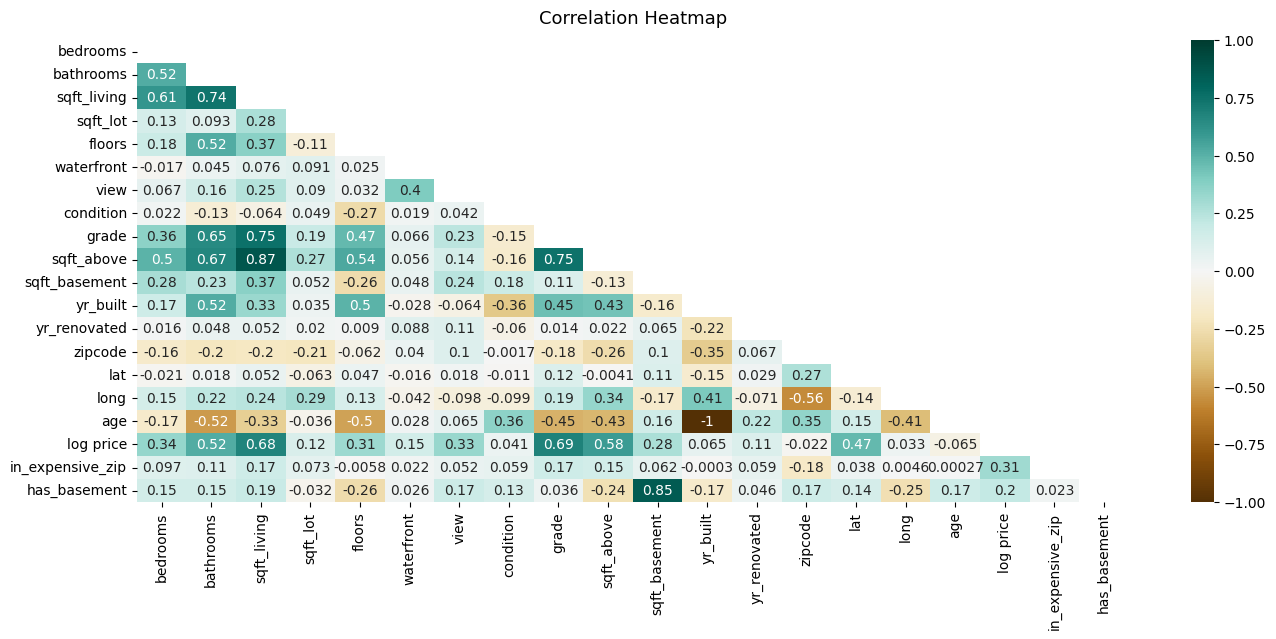

In [26]:
plt.figure(figsize=(16, 6))
corr = data.drop(columns=['id', 'sqft_living15', 'sqft_lot15', 'price']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=mask, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=12)

In [27]:
data.to_csv('traindata.csv', index=False)

In [28]:
datak = pd.read_csv("Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
king_county_data = datak[datak["CountyName"] == "King County"]
filtered_data = datak[datak["RegionName"].isin(pd.unique(data['zipcode']))]
filtered_data = filtered_data.drop(columns=["RegionID", "SizeRank", "StateName", "State", "CountyName", "RegionType", "Metro"])
nan_values = filtered_data.isna().any()

if nan_values.any():
    print("The following columns have NaN values:")
    print(nan_values[nan_values == True].index)
else:
    print("No NaN values found in any column.")

nan_rows = filtered_data[filtered_data["City"].isna()]
filtered_data.loc[nan_rows.index[0], "City"] = "Auburn"

filtered_data.to_csv('king_county_zip.csv', index=False)



The following columns have NaN values:
Index(['City'], dtype='object')
